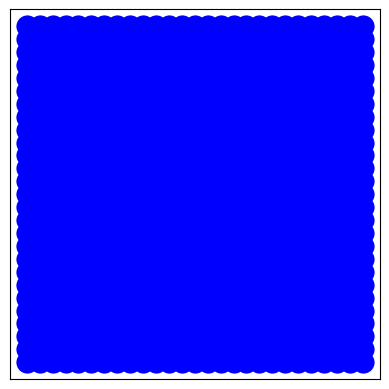


wartosci wlasne:
 [1.05317730e-06 4.21268969e-06 9.47847866e-06 1.68504467e-05
 2.63284572e-05 3.79123347e-05 5.16018647e-05 6.73967935e-05
 8.52968288e-05 1.05301639e-04 1.27410853e-04 1.51624063e-04
 1.77940818e-04 2.06360633e-04 2.36882981e-04 2.69507296e-04
 3.04232974e-04 3.41059372e-04 3.79985808e-04 4.21011561e-04
 4.64135871e-04 5.09357940e-04 5.56676930e-04 6.06091965e-04
 6.57602129e-04 7.11206469e-04 7.66903991e-04 8.24693664e-04
 8.84574419e-04 9.46545145e-04 1.01060469e-03 1.07675188e-03
 1.14498548e-03 1.21530423e-03 1.28770683e-03 1.36219193e-03
 1.43875816e-03 1.51740409e-03 1.59812828e-03 1.68092922e-03
 1.76580539e-03 1.85275521e-03 1.94177706e-03 2.03286931e-03
 2.12603027e-03 2.22125820e-03 2.31855135e-03 2.41790791e-03
 2.51932605e-03 2.62280388e-03 2.72833949e-03 2.83593093e-03
 2.94557620e-03 3.05727327e-03 3.17102007e-03 3.28681449e-03
 3.40465440e-03 3.52453760e-03 3.64646189e-03 3.77042499e-03
 3.89642462e-03 4.02445844e-03 4.15452408e-03 4.28661913e-03
 4.42

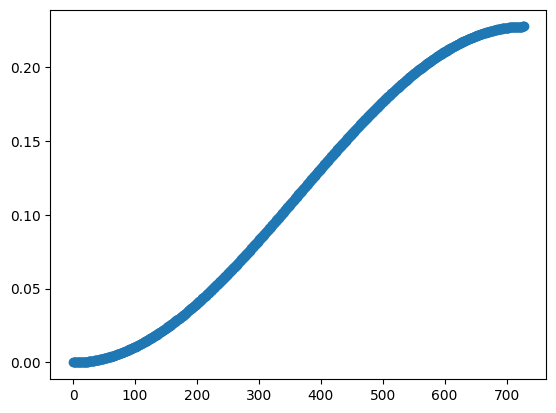

In [3]:
# import necesary modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from timeit import default_timer as timer

#layout_size_x = 1   # number of atoms in X axis
#layout_size_y = 1   # number of atoms in Y axis

# t = 0.2               # parameter of Hamiltonian
t = 0.056865404718729244

def initialize_layout(layout_size_x, layout_size_y):
    Layout = np.zeros((layout_size_y, layout_size_x), dtype=int)
    k = 1
    for i in range(layout_size_x):
        for j in range(layout_size_y):
            Layout[j][i] = k
            k += 1
    return Layout

def plot_layout(Layout):
    x = Layout.shape[1]
    y = Layout.shape[0]
    X = np.arange(1, x+1, 1, dtype=int)
    fig, axs = plt.subplots(1, 1)

    for i in range(y):
        Y=[]
        for j in range(x):
            Y.append(i+1)
        axs.scatter(X, Y, c='blue', linewidths=10)
    axs.set_aspect('equal', 'box')
    formatter = mticker.ScalarFormatter()
    axs.xaxis.set_major_formatter(formatter)
    axs.xaxis.set_major_locator(mticker.FixedLocator([]))
    axs.yaxis.set_major_locator(mticker.FixedLocator([]))
    plt.show()

def initialize_hamiltonian(Layout, t):
    elements = Layout.shape[0]*Layout.shape[1]

    Hamiltonian = np.zeros((elements,elements))
    for j in range(elements-1):
        Hamiltonian[j, j + 1] = -t
        Hamiltonian[j + 1, j] = -t
   
    for i in range(elements):
       Hamiltonian[i][i] = 2*t

    return Hamiltonian

def diagonalize_hamiltonian(Hamiltonian):
    w,v =  np.linalg.eig(Hamiltonian)
    idx = w.argsort()
    w = w[idx]
    v = v[:,idx]
    diagonal = np.diag(w)
    print("\nwartosci wlasne:\n", w)
    # print("\nwektory wlasne:\n", v)
    # print('\nZdiagonalizowany Hamiltonian:\n', diagonal)
    plt.plot(w, 'o')
    plt.show()
    return diagonal

x = 27
layout_size_x, layout_size_y = x, x
plot_layout(initialize_layout(layout_size_x, layout_size_y))
diagonalizated_hamiltonain = diagonalize_hamiltonian(initialize_hamiltonian(initialize_layout(layout_size_x, layout_size_y), t))


Size =  54


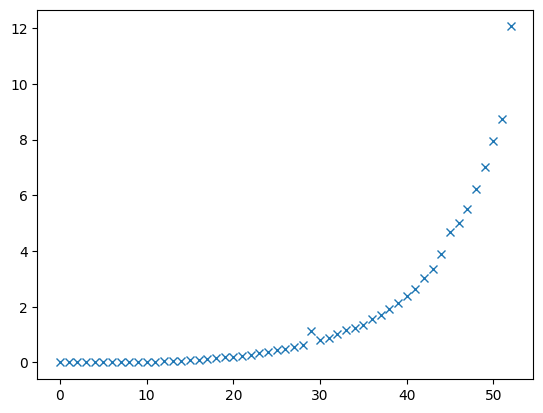

In [45]:
timeTable = np.array([0])
x=2
while True:
    start = timer()
    diagonalizated_hamiltonain = diagonalize_hamiltonian(initialize_hamiltonian(initialize_layout(x, x), t))
    end = timer()
    timeTable = np.append(timeTable, end - start)
    
    if end - start > 10:
        break
    else:
        x += 1
timeTable=timeTable[1:]
print("Size = ", len(timeTable))
plt.plot(timeTable[1:], 'x')
plt.show()

In [2]:
# import necesary modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from timeit import default_timer as timer

# important variable
t = 0.056865404718729244

# functions
def initialize_hamiltonian(element, t):
    elements = element * element

    Hamiltonian = np.zeros((elements,elements))
    for j in range(elements-1):
        Hamiltonian[j, j + 1] = -t
        Hamiltonian[j + 1, j] = -t
   
    for i in range(elements):
       Hamiltonian[i][i] = 4*t

    return Hamiltonian

def diagonalize_hamiltonian(Hamiltonian):
    w,v =  np.linalg.eig(Hamiltonian)
    idx = w.argsort()
    w = w[idx]
    v = v[:,idx]
    diagonal = np.diag(w)
    #print("\nwartosci wlasne:\n", w)
    #print("\nwektory wlasne:\n", v)
    #print('\nZdiagonalizowany Hamiltonian:\n', diagonal)
    return diagonal

# main part
timeTable = np.array([0])
x=2
while True:
    start = timer()
    diagonalizated_hamiltonain = diagonalize_hamiltonian(initialize_hamiltonian(x, t))
    end = timer()
    timeTable = np.append(timeTable, end - start)
    
    if end - start > 5:
        break
    else:
        x += 1
timeTable=timeTable[1:]
print("Size = ", len(timeTable))
plt.plot(timeTable[1:], 'x')
plt.show()

In [1]:
def calculate_welded_joint(width, thickness):
    """
    Funkcja obliczająca sumę belek stali S235 o zadanej szerokości i grubości.

    :param width: Szerokość belki (mm)
    :param thickness: Grubość belki (mm)
    :return: Suma belek (tony)
    """

    # Współczynniki gęstości stali S235
    density = 7.85 # g/cm³

    # Pobranie wymiarów belki
    width_in_cm = width / 10
    thickness_in_cm = thickness / 10

    # Obliczenie objętości belki
    volume = width_in_cm * thickness_in_cm * 1000 # w cm³

    # Obliczenie masy belek
    mass = density * volume # w g

    return mass / 1000 # w tonách

# Przykład użycia funkcji
width = 200 # Szerokość belki (mm)
thickness = 15 # Grubość belki (mm)
print(calculate_welded_joint(width, thickness)) # Wynik: suma belek w tonach

235.5


In [ ]:
def V_n_direct(dist_sqr, V_max, r_0):
    dist_sqr = abs(dist_sqr)
    if np.sqrt(dist_sqr) >= r_0:
        return 0
    else:
        return V_max/(r_0*r_0) * dist_sqr - V_max

def V_n(dist_sqr, V_max, r_0):
    a_help = np.zeros_like(dist_sqr)
    for i in range(len(dist_sqr)):
        a_help[i] = V_n_direct(dist_sqr[i], V_max, r_0)
    return a_help

Layout = initialize_layout(N_help, a)
x = np.linspace(-N_help*a,N_help*a,N_help)
y = np.linspace(-N_help*a,N_help*a,N_help) 
xx, yy = np.meshgrid(x, y)

R = ((a*xx)**2 + (a*yy)**2)

f = lambda R, V_max, r_0: V_n(R, V_max, r_0)
Potencial = np.array(list(map(f(R, V_max, r_0))))

#  show middle Potencial
'''plt.plot(Potencial[math.floor(len(Potencial)/2)])
plt.ylabel("V(x,y)")
plt.xlabel("x (A)")
plt.show()
plt.clf()

# show all Potencial
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, Potencial, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()
plt.clf()'''

#for elem in Layout["realLocation"]:
#    plt.scatter(elem[1][0], elem[1][1], c='blue', linewidths=1)
plot_layout(Layout)
plt.gca().set_aspect('equal', 'box')
plt.imshow(Potencial, cmap=cm.plasma)
plt.colorbar()
plt.show()

In [1]:
x = lambda a, b, c : a + b + c
print(x(5, 6, 2))

13


In [11]:
import numpy as np
A = np.array([1,2,3,4,5,6,7,8,9])
A[1]

2

In [ ]:
#Hamiltonian without Potential
def initialize_hamiltonian(Layout, t, PBC:bool):
    site_elements = Layout["2Dneighbours"].shape[0]
    elements = len(Layout["realLocation"])
    Hamiltonian = np.zeros((elements,elements))
    
    for i in range(site_elements):
        for j in range(site_elements):
            elem = Layout["2Dneighbours"][i,j] - 1

            next_x, prev_x, next_y, prev_y = neighbours(Layout["2Dneighbours"], i, j, PBC)

            if next_x in range(elements):
                Hamiltonian[next_x,elem] = -t
                Hamiltonian[elem,next_x] = -t

            if prev_x in range(elements):    
                Hamiltonian[prev_x,elem] = -t
                Hamiltonian[elem,prev_x] = -t

            if next_y in range(elements):
                Hamiltonian[next_y,elem] = -t
                Hamiltonian[elem,next_y] = -t
            
            if prev_y in range(elements):
                Hamiltonian[prev_y,elem] = -t
                Hamiltonian[elem,prev_y] = -t

    for i in range(elements):

       Hamiltonian[i][i] = 4*t
       
    return Hamiltonian



In [1]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


NameError: name 'plt' is not defined